### Support Vector Classification Implementation

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
### Lets create synthetic data points
from sklearn.datasets import make_classification

In [5]:
X,y=make_classification(n_samples=10000,n_features=5,n_clusters_per_class=3
                       ,n_redundant=0 ,n_informative=3)

<Axes: xlabel='0', ylabel='1'>

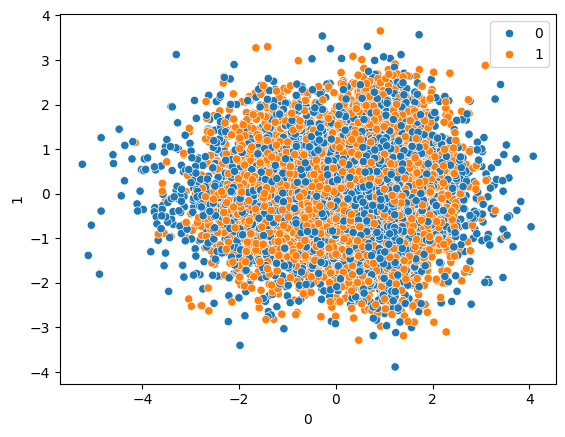

In [6]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [7]:
# Train test spilt
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [8]:
#Learning Model
from sklearn.svm import SVC
svc=SVC()#Just using default-- as data is seperable we can use linear
svc.fit(X_train,y_train)


,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [9]:
#Prediction
y_pred=svc.predict(X_test)

In [10]:
#Metric Calculation
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1496
           1       0.83      0.86      0.85      1504

    accuracy                           0.84      3000
   macro avg       0.84      0.84      0.84      3000
weighted avg       0.84      0.84      0.84      3000

[[1240  256]
 [ 213 1291]]


##### Using Different Kernels

In [11]:
# RBF
rbf=SVC(kernel='rbf')
rbf.fit(X_train,y_train)
y_pred_rbf=rbf.predict(X_test)
print(classification_report(y_test,y_pred_rbf))
print(confusion_matrix(y_test,y_pred_rbf))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1496
           1       0.83      0.86      0.85      1504

    accuracy                           0.84      3000
   macro avg       0.84      0.84      0.84      3000
weighted avg       0.84      0.84      0.84      3000

[[1240  256]
 [ 213 1291]]


In [12]:
# RBF
rbf=SVC(kernel='linear')
rbf.fit(X_train,y_train)
y_pred_rbf=rbf.predict(X_test)
print(classification_report(y_test,y_pred_rbf))
print(confusion_matrix(y_test,y_pred_rbf))

              precision    recall  f1-score   support

           0       0.64      0.75      0.69      1496
           1       0.70      0.58      0.63      1504

    accuracy                           0.66      3000
   macro avg       0.67      0.66      0.66      3000
weighted avg       0.67      0.66      0.66      3000

[[1115  381]
 [ 629  875]]


In [13]:
#Poly
poly=SVC(kernel='poly')
poly.fit(X_train,y_train)
y_pred_rbf=poly.predict(X_test)
print(classification_report(y_test,y_pred_rbf))
print(confusion_matrix(y_test,y_pred_rbf))

              precision    recall  f1-score   support

           0       0.66      0.81      0.73      1496
           1       0.75      0.59      0.66      1504

    accuracy                           0.70      3000
   macro avg       0.71      0.70      0.70      3000
weighted avg       0.71      0.70      0.70      3000

[[1206  290]
 [ 614  890]]


In [ ]:
# sigmoid
sigmoid=SVC(kernel='sigmoid')
sigmoid.fit(X_train,y_train)
y_pred_rbf=sigmoid.predict(X_test)
print(classification_report(y_test,y_pred_rbf))
print(confusion_matrix(y_test,y_pred_rbf))

              precision    recall  f1-score   support

           0       0.50      0.52      0.51      1496
           1       0.50      0.49      0.49      1504

    accuracy                           0.50      3000
   macro avg       0.50      0.50      0.50      3000
weighted avg       0.50      0.50      0.50      3000

[[771 725]
 [773 731]]


##### hyper paramaeter Tuning
1. What is the C Parameter? (Regularization)Think of C as the "perfectionism" setting. 
It tells the SVM how much you care about misclassifying training points versus having a clean, wide margin.

Low C (The Chill Parent): Prioritizes a wide margin, even if it means some training points are misclassified. It creates a smoother, simpler decision boundary.Result: High bias, low variance (Underfitting risk).

High C (The Perfectionist): Prioritizes correct classification of every single training point. It will "squeeze" the margin or make the boundary wiggly just to get every point right.Result: Low bias, high variance (Overfitting risk).


2. What is the Gamma ($\gamma$) Parameter? (Kernel Influence)Gamma is specific to non-linear kernels like RBF (Gaussian). It determines the "reach" or "influence" of a single training point.

Low Gamma (Long Reach): Each point has a far-reaching influence. The model considers points that are far away when deciding the boundary, leading to a smoother, more general curve.Analogy: A broad, flat hill.

High Gamma (Short Reach): Only points very close to the boundary have an influence. The model tries to "wrap" around every individual point.Analogy: Steep, narrow peaks.Result: Can lead to complex, "island-like" boundaries (Overfitting risk).

3. How to Tune Them (The Strategy)Because C and Gamma interact, you shouldn't tune them one at a time. The most common method is using a Grid Search with Cross-Validation.Recommended Search GridUsually, we search on a logarithmic scale because the impact of these parameters changes exponentially:
C: $[0.1, 1, 10, 100, 1000]
$Gamma: $[1, 0.1, 0.01, 0.001, 0.0001]

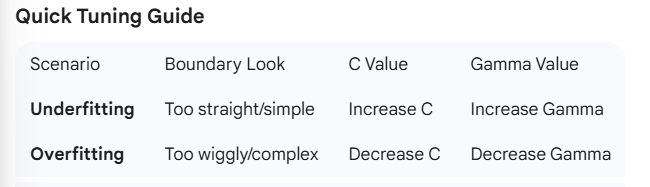

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report
'''
# 1. Load data (using the classic Iris dataset for simplicity)
iris = datasets.load_iris()
X = iris.data
y = iris.target

# 2. Split and Scale (CRITICAL for SVM)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
'''

# 3. Define the "Grid" of parameters to test
# We use a logarithmic scale (0.1, 1, 10...) to cover a wide range
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf','sigmoid','liner','poly'] # Gamma is specific to non-linear kernels like RBF
}

# 4. Initialize GridSearchCV
# cv=5 means 5-fold cross-validation
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=5)

# 5. Run the search
grid.fit(X_train, y_train)

# 6. Results
print(f"Best Parameters: {grid.best_params_}")
print(f"Best Score: {grid.best_score_:.2f}")

# 7. Evaluate on unseen test data
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best Score: 0.95
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

